In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import sys
sys.path.append("../src") 

In [3]:
from data.wav_data_reader import WavDataReader
from data.signal_dataset import SignalDataset
from features.independent_wav_feature_extractor import IndependentWavFeatureExtractor
from features.features_dataset import FeaturesDataset

Reader

In [4]:
test_file= r"..\data\interim\testing\#2_#12_230429_SK1_M3_BYB_Recording_2023-04-29_14.42.37.wav"

In [5]:
sample_rate= 10000
reader1= WavDataReader(filename= test_file, sample_rate= sample_rate, extract_key= True)

Signal Dataset

In [6]:
signal_dataset1= SignalDataset(signals= reader1.get_values(), labels= reader1.get_keys(), sample_rate= 10000)
signal_dataset1.standardize_signals("zscore") 

In [7]:
time_intervals = [(10, 20)] 
signal_dataset1.reduce_signals_given_intervals(time_intervals)

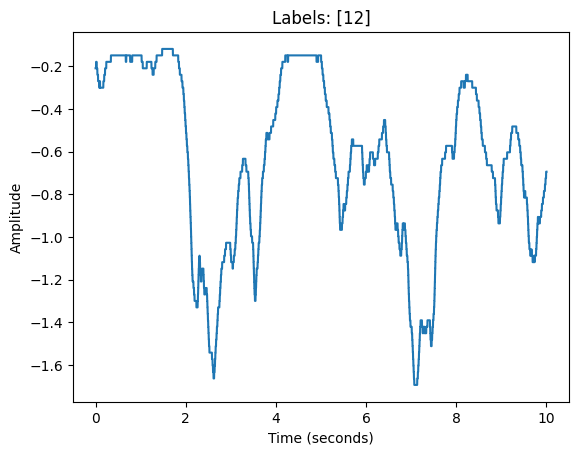

In [8]:
signal_dataset1.display_dataset()

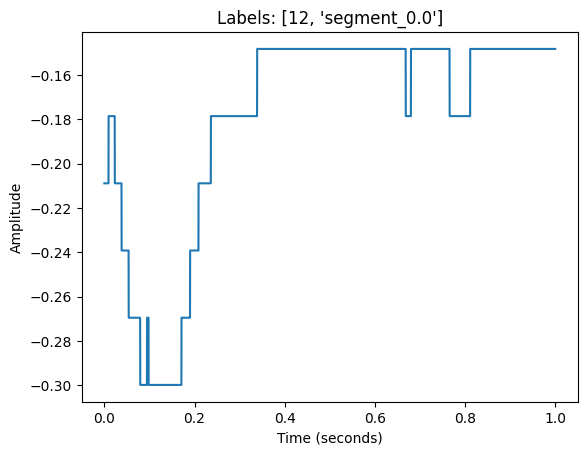

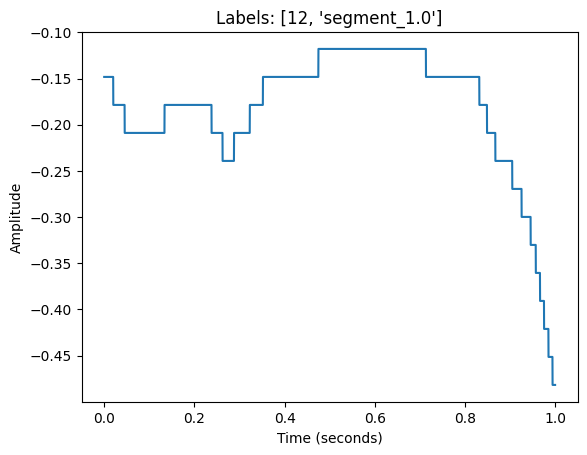

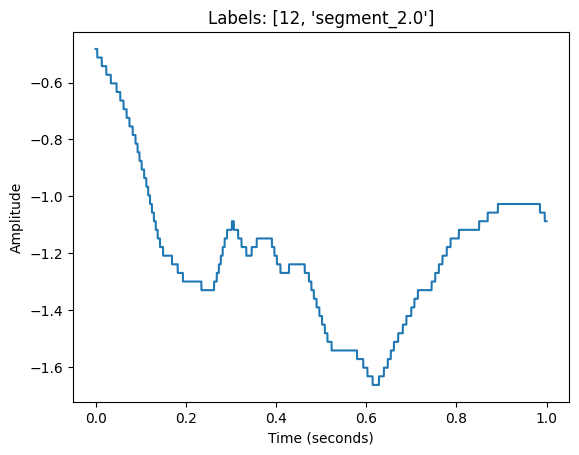

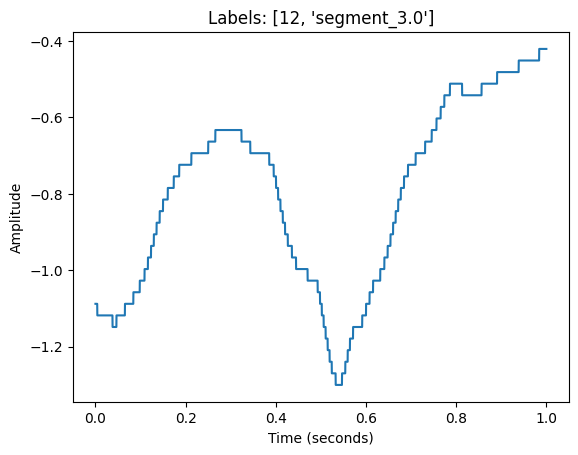

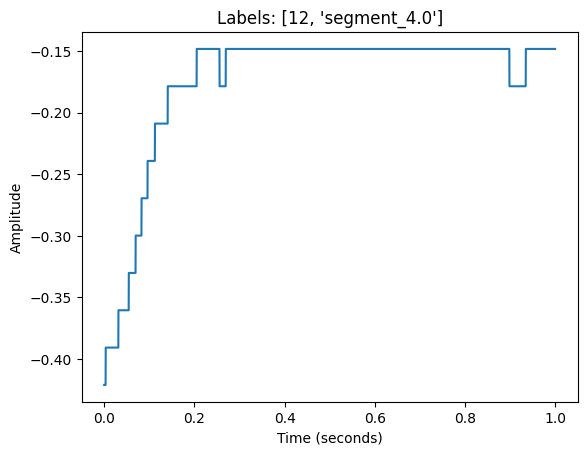

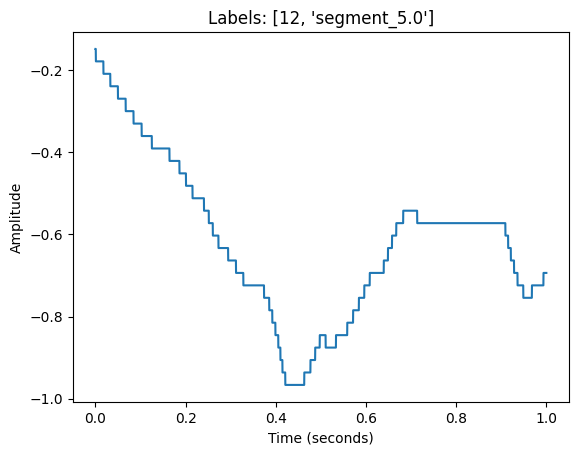

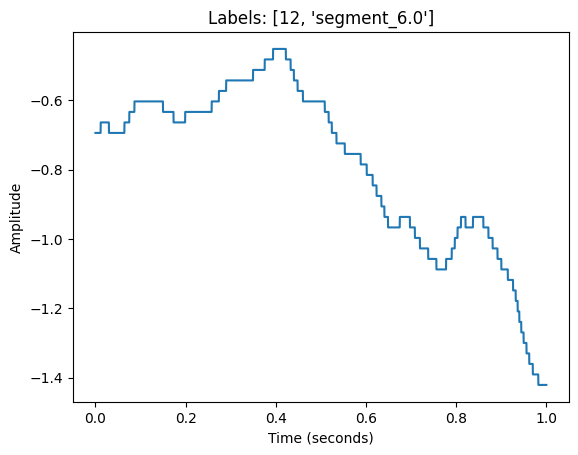

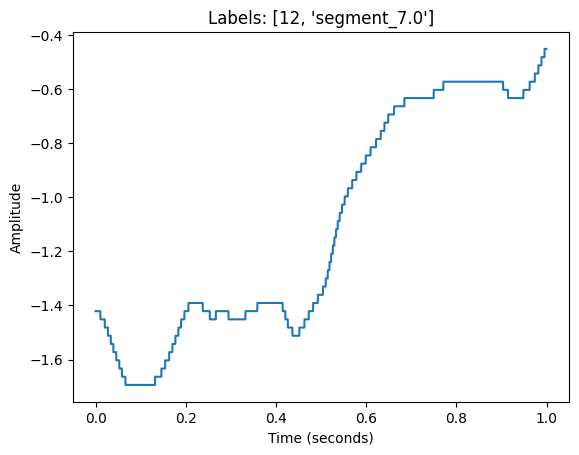

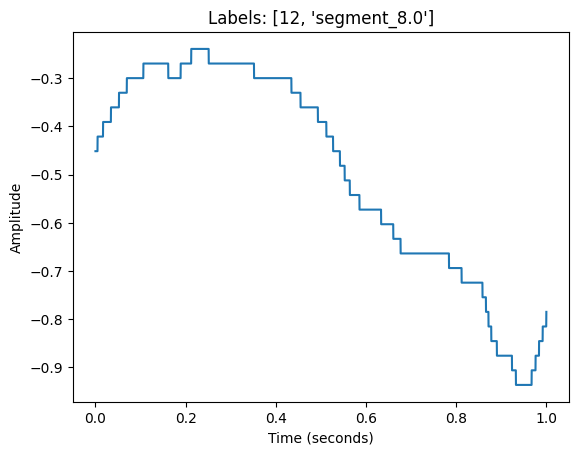

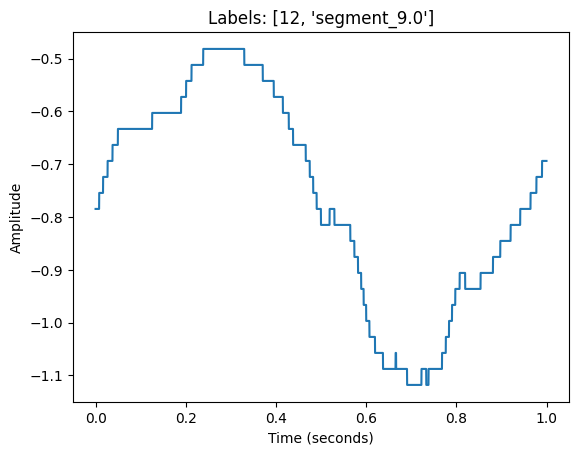

In [9]:
signal_dataset1.segment_signals(segment_duration=1)
signal_dataset1.display_dataset()

In [ ]:
extractor= IndependentWavFeatureExtractor(sample_rate= sample_rate, n_mfcc= 13, n_fft= 2000, hop_length= 500)
features,labels= extractor.extract_all_features(signal_dataset1.signals[0])

for value, label in zip(features, labels):
    print(label,": ",value)

In [ ]:
print(labels)

In [ ]:
feat_dataset1= FeaturesDataset(features= [features], targets=signal_dataset1.get_labels(),feature_labels=labels)
feat_dataset1.get_data()

In [ ]:
feat_dataset1.remove_nan_columns()
feat_dataset1.get_data()

In [ ]:
feat_dataset1.get_labels()

In [ ]:
from features_dataset import FeaturesDataset
from feature_classificator import FeatureClassificator
from torch.utils.data import DataLoader
import torch

# Step 1: Prepare the dataset
features, targets = load_your_data()  # Load your data here
feature_labels = ["feature1", "feature2", ...]  # Replace with your feature labels

# Split your data into training and validation sets
train_features, val_features, train_targets, val_targets = train_test_split(features, targets)

# Create FeaturesDataset instances for training and validation
train_dataset = FeaturesDataset(train_features, train_targets, feature_labels)
val_dataset = FeaturesDataset(val_features, val_targets, feature_labels)

# Step 2: Create DataLoaders
batch_size = 32  # You can adjust the batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Step 3: Initialize the model
num_features = len(feature_labels)
num_classes = len(set(targets))  # Assuming targets are your class labels
model = FeatureClassificator(num_features, num_classes)

# Step 4: Train the model
num_epochs = 10  # Set the number of epochs
learning_rate = 0.001  # Set the learning rate
model.train_model(train_loader, val_loader, num_epochs, learning_rate)

# Step 5: Evaluate the model (optional, if you have a test set)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)
# test_accuracy = model.validate(test_loader)

# Step 6: Make predictions (optional)
# predictions = model.predict(your_test_loader)
